<a href="https://colab.research.google.com/github/Xinyi-Christie-Dong/DubsTech-Datathon-2026/blob/main/access_to_a_livable_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_2025 = pd.read_csv('/content/drive/MyDrive/Datathon 2026/Access_to_a_Livable_Planet_Dataset.csv')
df_2024 = pd.read_csv('/content/drive/MyDrive/Datathon 2026/annual_aqi_by_county_2024.csv')
df_2023 = pd.read_csv('/content/drive/MyDrive/Datathon 2026/annual_aqi_by_county_2023.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/Datathon 2026/annual_aqi_by_county_2022.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/Datathon 2026/annual_aqi_by_county_2021.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Datathon 2026/annual_aqi_by_county_2020.csv')

df= pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)


df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,269,223,46,0,0,0,0,74,54,38,0,0,178,91,0
1,Alabama,Clay,2020,105,83,22,0,0,0,0,88,56,34,0,0,0,105,0
2,Alabama,DeKalb,2020,364,332,32,0,0,0,0,91,49,37,0,0,309,55,0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0
4,Alabama,Etowah,2020,276,239,37,0,0,0,0,93,53,36,0,0,191,85,0


In [4]:
df.describe()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000
mean,2022.485117,308.091137,224.287124,79.542475,3.174749,0.828094,0.176087,0.082609,131.196488,59.606856,39.339465,0.570401,3.247993,150.871906,144.193813,9.207023
std,1.705911,83.614047,76.185132,61.291069,7.908580,3.520311,1.606954,0.817233,155.973890,15.916641,10.570852,8.629903,22.887931,113.966757,119.114775,41.318999
min,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,255.750000,178.000000,27.000000,0.000000,0.000000,0.000000,0.000000,87.000000,51.000000,35.000000,0.000000,0.000000,54.750000,9.750000,0.000000
50%,2022.000000,360.000000,227.500000,67.000000,1.000000,0.000000,0.000000,0.000000,106.000000,58.000000,41.000000,0.000000,0.000000,147.000000,135.000000,0.000000
75%,2024.000000,365.000000,282.000000,121.000000,3.000000,0.000000,0.000000,0.000000,143.000000,65.000000,45.000000,0.000000,0.000000,239.000000,238.000000,0.000000
max,2025.000000,366.000000,365.000000,298.000000,109.000000,69.000000,75.000000,31.000000,8368.000000,224.000000,122.000000,259.000000,365.000000,366.000000,366.000000,366.000000


In [5]:
# Missing values check
missing = df.isna().mean().sort_values(ascending=False)
missing.head(20)

,0
State,0.0
County,0.0
Year,0.0
Days with AQI,0.0
Good Days,0.0
Moderate Days,0.0
Unhealthy for Sensitive Groups Days,0.0
Unhealthy Days,0.0
Very Unhealthy Days,0.0
Hazardous Days,0.0


In [6]:
# Duplicate checks
df.duplicated().sum()

np.int64(0)

In [7]:
# Drop outliers (AQI > 500)
df = df.drop(df[df['Max AQI'] > 500].index)
df.describe()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,2022.499492,307.538800,224.698577,78.938157,3.004066,0.739410,0.140291,0.018299,119.750085,59.209590,39.257370,0.577431,3.284480,151.640969,143.514402,8.521518
std,1.701973,83.835002,75.863318,60.974377,7.381923,3.240128,1.517108,0.171728,53.716473,15.024184,10.409885,8.686505,23.035929,114.064847,118.904807,39.716921
min,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,251.000000,178.000000,26.250000,0.000000,0.000000,0.000000,0.000000,87.000000,51.000000,35.000000,0.000000,0.000000,58.000000,8.000000,0.000000
50%,2022.000000,359.000000,228.000000,67.000000,1.000000,0.000000,0.000000,0.000000,105.000000,58.000000,40.000000,0.000000,0.000000,147.000000,135.000000,0.000000
75%,2024.000000,365.000000,282.000000,121.000000,3.000000,0.000000,0.000000,0.000000,141.000000,65.000000,45.000000,0.000000,0.000000,240.000000,238.000000,0.000000
max,2025.000000,366.000000,365.000000,298.000000,109.000000,69.000000,75.000000,4.000000,494.000000,216.000000,122.000000,259.000000,365.000000,366.000000,366.000000,366.000000


In [8]:
# Key-based duplicates
key_cols = [c for c in ['State','County','Year'] if c in df.columns]
df.duplicated(subset=key_cols).sum()

np.int64(0)

In [9]:
#Check for columns uniqueness
df.nunique()

,0
State,54
County,799
Year,6
Days with AQI,300
Good Days,357
Moderate Days,276
Unhealthy for Sensitive Groups Days,69
Unhealthy Days,40
Very Unhealthy Days,16
Hazardous Days,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5902 entries, 0 to 5979
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                5902 non-null   object
 1   County                               5902 non-null   object
 2   Year                                 5902 non-null   int64 
 3   Days with AQI                        5902 non-null   int64 
 4   Good Days                            5902 non-null   int64 
 5   Moderate Days                        5902 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  5902 non-null   int64 
 7   Unhealthy Days                       5902 non-null   int64 
 8   Very Unhealthy Days                  5902 non-null   int64 
 9   Hazardous Days                       5902 non-null   int64 
 10  Max AQI                              5902 non-null   int64 
 11  90th Percentile AQI                  5902 non-nu

In [11]:
# count the records of every state
state_counts = df['State'].value_counts()
state_counts

,count
State,
California,281
Texas,269
Pennsylvania,233
Ohio,229
Florida,229
North Carolina,211
Indiana,199
Virginia,184
Colorado,178


In [12]:
# Drop states who only contains below 10 recrod
df_cleaned = df[df['State'].isin(state_counts[state_counts > 10].index)].copy()

In [13]:
# Compute percent of unhealthy days (Unhealthy Days / Days with AQI)
df_cleaned['Unhealthy_Days_Percent'] = (df_cleaned['Unhealthy Days'] / df_cleaned['Days with AQI']) * 100

In [14]:
df_cleaned.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Unhealthy_Days_Percent
0,Alabama,Baldwin,2020,269,223,46,0,0,0,0,74,54,38,0,0,178,91,0,0.0
1,Alabama,Clay,2020,105,83,22,0,0,0,0,88,56,34,0,0,0,105,0,0.0
2,Alabama,DeKalb,2020,364,332,32,0,0,0,0,91,49,37,0,0,309,55,0,0.0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0,0.0
4,Alabama,Etowah,2020,276,239,37,0,0,0,0,93,53,36,0,0,191,85,0,0.0


In [15]:
# Aggragate Unhealthy_Days_Perce by county
county_summary = df_cleaned.groupby('County').agg({
    'Days with AQI': 'sum',
    'Good Days': 'sum',
    'Moderate Days': 'sum',
    'Unhealthy Days': 'sum',
    'Max AQI': 'max',
    'Median AQI': 'mean',
    'Days Ozone': 'sum',
    'Days PM2.5': 'sum',
    'Unhealthy_Days_Percent' : 'mean'
}).reset_index()

In [16]:
#Which counties experience the most Unhealthy or Hazardous Days?
county_summary.sort_values(by='Unhealthy_Days_Percent',ascending=False).head(10)

,County,Days with AQI,Good Days,Moderate Days,Unhealthy Days,Max AQI,Median AQI,Days Ozone,Days PM2.5,Unhealthy_Days_Percent
621,San Bernardino,1735,157,918,268,486,83.600000,1013,624,15.366132
596,Riverside,1005,91,529,136,365,87.666667,587,298,13.375690
416,Los Angeles,2101,170,1294,204,281,77.000000,1018,989,9.743754
438,Maricopa,2131,174,1259,162,366,88.166667,1360,395,7.424803
368,Kern,2100,364,1167,102,314,74.833333,1116,892,4.651421
719,Tulare,1694,349,873,85,242,71.200000,913,739,4.648851
245,Fairbanks North Star,2009,1204,620,82,325,41.500000,570,1425,3.924451
264,Fresno,2131,505,1213,69,346,66.666667,1105,959,3.154233
376,Klamath,1642,988,572,38,237,39.200000,0,1642,2.081294
309,Harris,2101,348,1562,43,205,60.333333,543,1433,2.067755


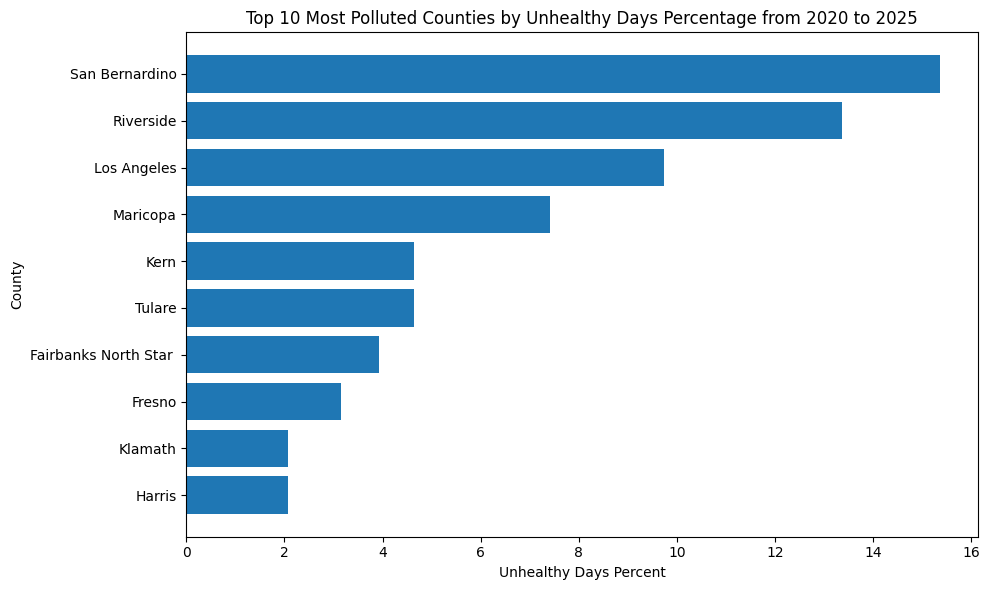

In [17]:
# Plot the top 10 counties
top10_counties = (county_summary.sort_values(by='Unhealthy_Days_Percent', ascending=False).head(10)
)


plt.figure(figsize=(10, 6))
plt.barh(
    top10_counties['County'],
    top10_counties['Unhealthy_Days_Percent']
)

plt.xlabel('Unhealthy Days Percent')
plt.ylabel('County')
plt.title('Top 10 Most Polluted Counties by Unhealthy Days Percentage from 2020 to 2025')

# highest value on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [18]:
#Aggregate by state for easier mapping
state_summary = df_cleaned.groupby(['State']).agg({
    'Days with AQI': 'sum',
    'Good Days': 'sum',
    'Moderate Days': 'sum',
    'Unhealthy Days': 'sum',
    'Max AQI': 'max',
    'Median AQI': 'mean',
    'Days Ozone': 'sum',
    'Days PM2.5': 'sum',
    'Unhealthy_Days_Percent' : 'mean'
}).reset_index()

In [19]:
# Which states experience the most Unhealthy or Hazardous Days?
state_summary.sort_values(by='Unhealthy_Days_Percent',ascending=False).head()

,State,Days with AQI,Good Days,Moderate Days,Unhealthy Days,Max AQI,Median AQI,Days Ozone,Days PM2.5,Unhealthy_Days_Percent
4,California,94695,53002,35922,1464,486,48.064057,49173,42546,1.468510
33,North Dakota,18542,14666,3459,133,323,38.648148,11466,6988,0.766134
2,Arizona,25389,16512,7785,197,494,44.739726,14726,3929,0.750567
36,Oregon,37137,27740,8723,263,481,32.765217,4812,32235,0.630447
27,Nevada,17976,13035,4493,103,480,40.259259,10682,3875,0.530848


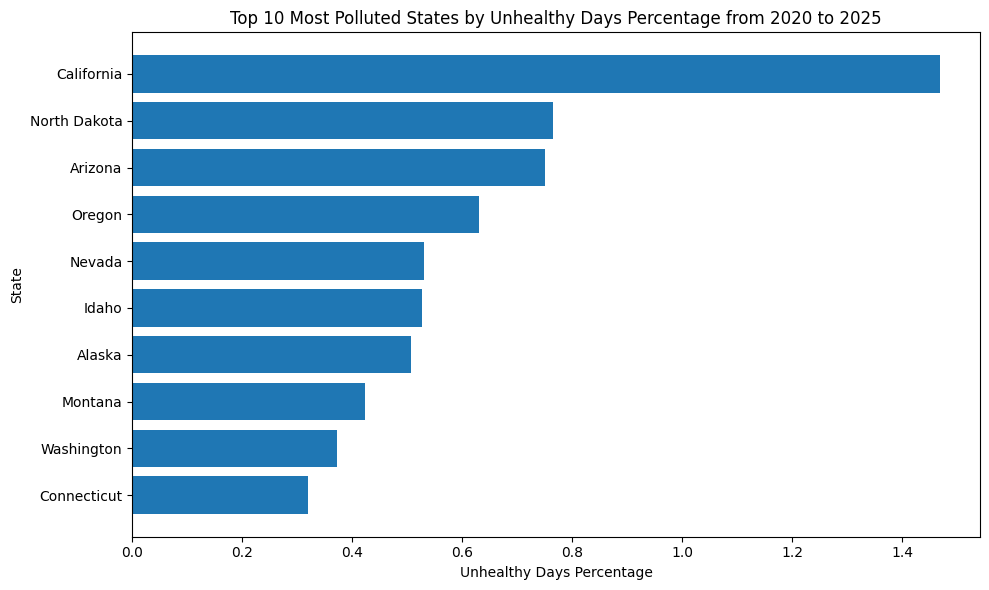

In [20]:
# Plot the top 10 states
top10_states = (state_summary.sort_values(by='Unhealthy_Days_Percent', ascending=False).head(10))


plt.figure(figsize=(10, 6))
plt.barh(
    top10_states['State'],
    top10_states['Unhealthy_Days_Percent']
)

plt.xlabel('Unhealthy Days Percentage')
plt.ylabel('State')
plt.title('Top 10 Most Polluted States by Unhealthy Days Percentage from 2020 to 2025')

# highest value on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [21]:
#Since California has consistently been the number one for the most unhealthy days, it will be interesting to examine how it has changed over the period of 2020 to 2025.
#Filter for California
ca_data = df_cleaned[df_cleaned['State'] == 'California'].copy()

#Add Column: Regional Divide. This separates the maritime-cooled coast from the mountain-trapped Inland Valley
coastal_counties = ['Los Angeles', 'Orange', 'San Diego', 'San Francisco', 'Marin',
                    'Monterey', 'Santa Barbara', 'Ventura', 'San Luis Obispo',
                    'Santa Cruz', 'Alameda', 'Contra Costa', 'San Mateo', 'Sonoma']

ca_data['Geography'] = ca_data['County'].apply(lambda x: 'Coastal' if x in coastal_counties else 'Inland')

ca_data.to_csv('California_Master_2020_2025.csv', index=False)

In [22]:
df_cleaned.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Unhealthy_Days_Percent
0,Alabama,Baldwin,2020,269,223,46,0,0,0,0,74,54,38,0,0,178,91,0,0.0
1,Alabama,Clay,2020,105,83,22,0,0,0,0,88,56,34,0,0,0,105,0,0.0
2,Alabama,DeKalb,2020,364,332,32,0,0,0,0,91,49,37,0,0,309,55,0,0.0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0,0.0
4,Alabama,Etowah,2020,276,239,37,0,0,0,0,93,53,36,0,0,191,85,0,0.0


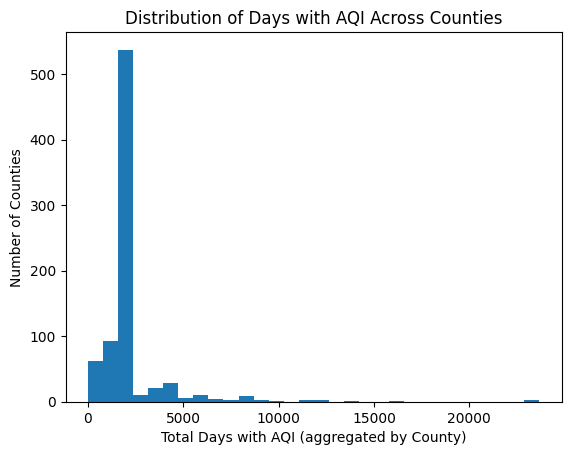

In [23]:
# plot the distribution of 'Days with AQI' aggreagated by 'County' in the dataset

# aggregate Days with AQI by County
county_aqi_days = (
    df_cleaned
    .groupby('County')['Days with AQI']
    .sum()
)

import matplotlib.pyplot as plt

plt.figure()
plt.hist(county_aqi_days, bins=30)
plt.xlabel('Total Days with AQI (aggregated by County)')
plt.ylabel('Number of Counties')
plt.title('Distribution of Days with AQI Across Counties')
plt.show()

Unhealthy Days                         1.000000
Unhealthy_Days_Percent                 0.994590
Unhealthy for Sensitive Groups Days    0.695532
Very Unhealthy Days                    0.597399
90th Percentile AQI                    0.587397
Max AQI                                0.442739
Median AQI                             0.317999
Moderate Days                          0.225897
Hazardous Days                         0.157266
Days with AQI                          0.120983
Days PM2.5                             0.095976
Days PM10                              0.020468
Days NO2                              -0.009759
Days CO                               -0.011791
Days Ozone                            -0.016034
Year                                  -0.064239
Good Days                             -0.171249
Name: Unhealthy Days, dtype: float64


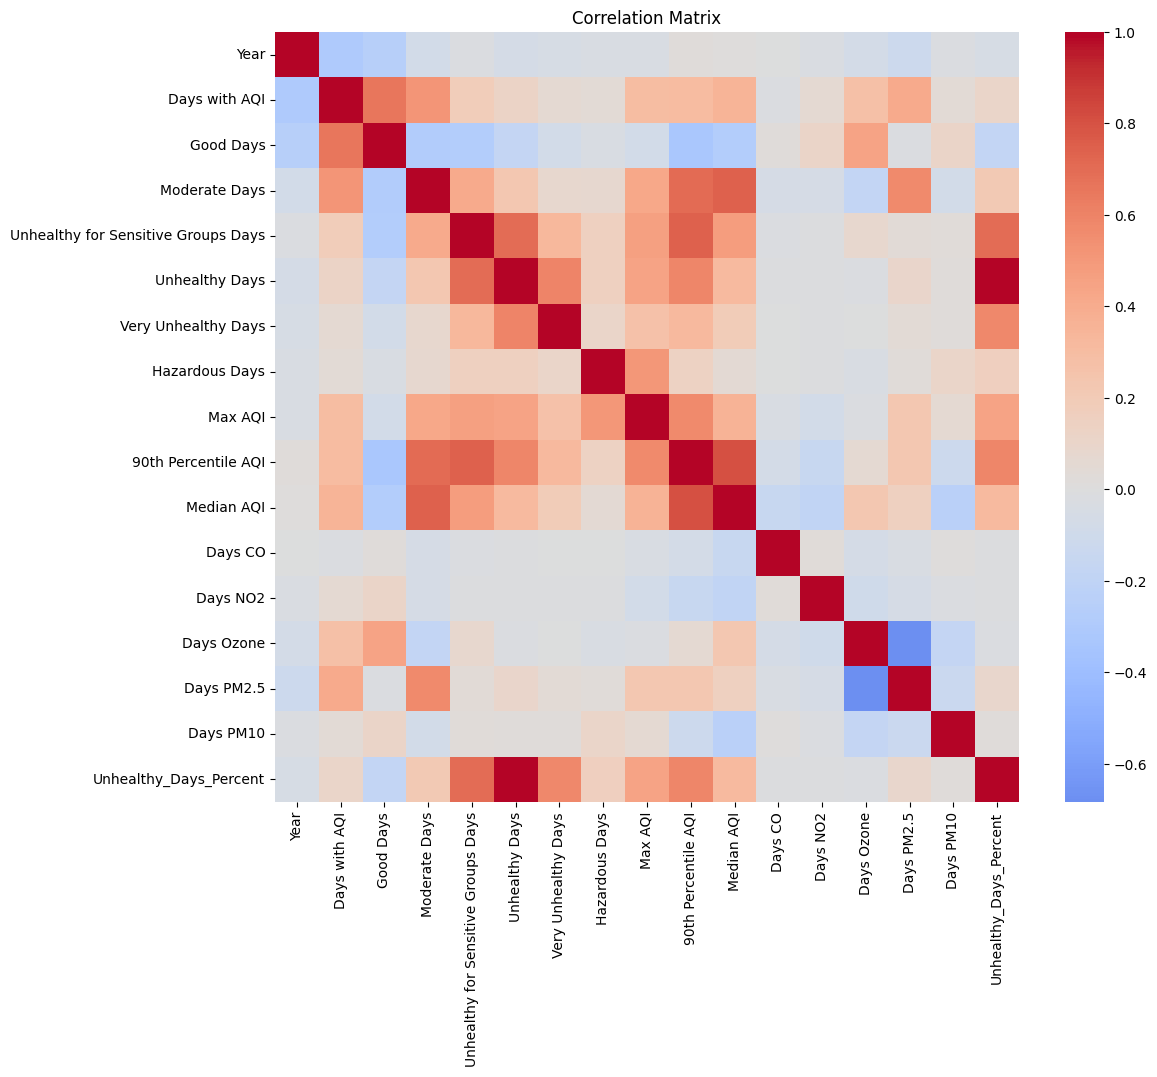

In [24]:
# Calculate correlations
numeric_df = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
target = 'Unhealthy Days'
print(correlation_matrix[target].sort_values(ascending=False))

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Strong Correlation:
Unhealthy for Sensitive Groups Days    0.695532
Very Unhealthy Days                    0.597399
90th Percentile AQI                    0.587397

In [25]:
# Linear regression
features = ['90th Percentile AQI',
            'Very Unhealthy Days',
            'Max AQI',
            'Days PM2.5',
            'Days Ozone',
            'Moderate Days']
X = df_cleaned[features]
y = df_cleaned['Unhealthy Days']

In [26]:
# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = model.predict(X_test_scaled)

In [28]:
# Evaluate
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)

r2,mae

(0.5160258452350857, 1.0138737919120568)

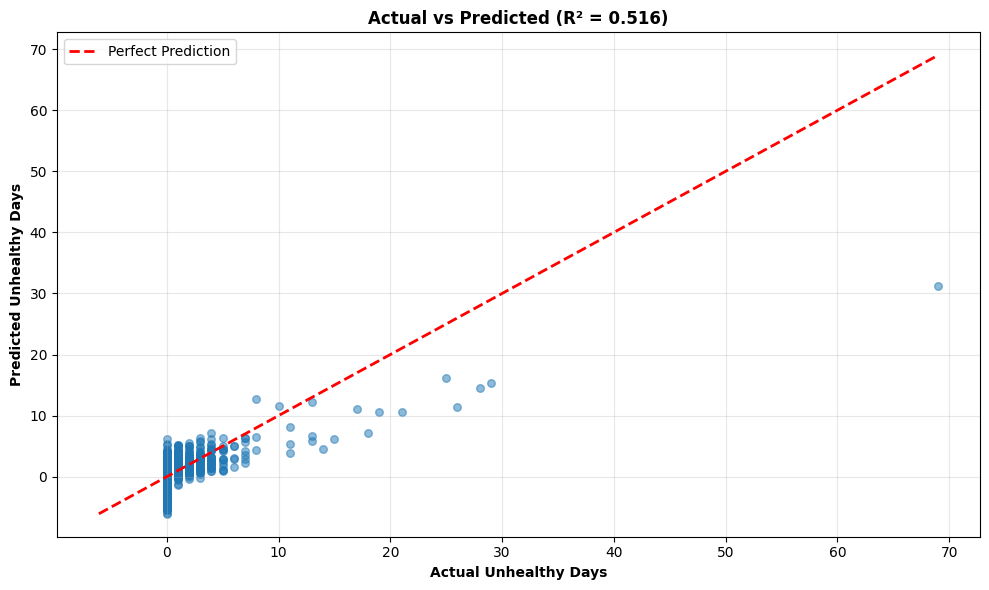

In [29]:
# Calculate metrics
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, s=30)

# Perfect prediction line (45-degree)
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Labels
plt.xlabel('Actual Unhealthy Days', fontweight='bold')
plt.ylabel('Predicted Unhealthy Days', fontweight='bold')
plt.title(f'Actual vs Predicted (R² = {r2:.3f})', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
features = ['Max AQI', '90th Percentile AQI', 'Median AQI', 'Days PM2.5']
X = df_cleaned[features]
y = df_cleaned['Unhealthy Days']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = model.predict(X_test)
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f} days")

R² Score: 0.866
MAE: 0.36 days


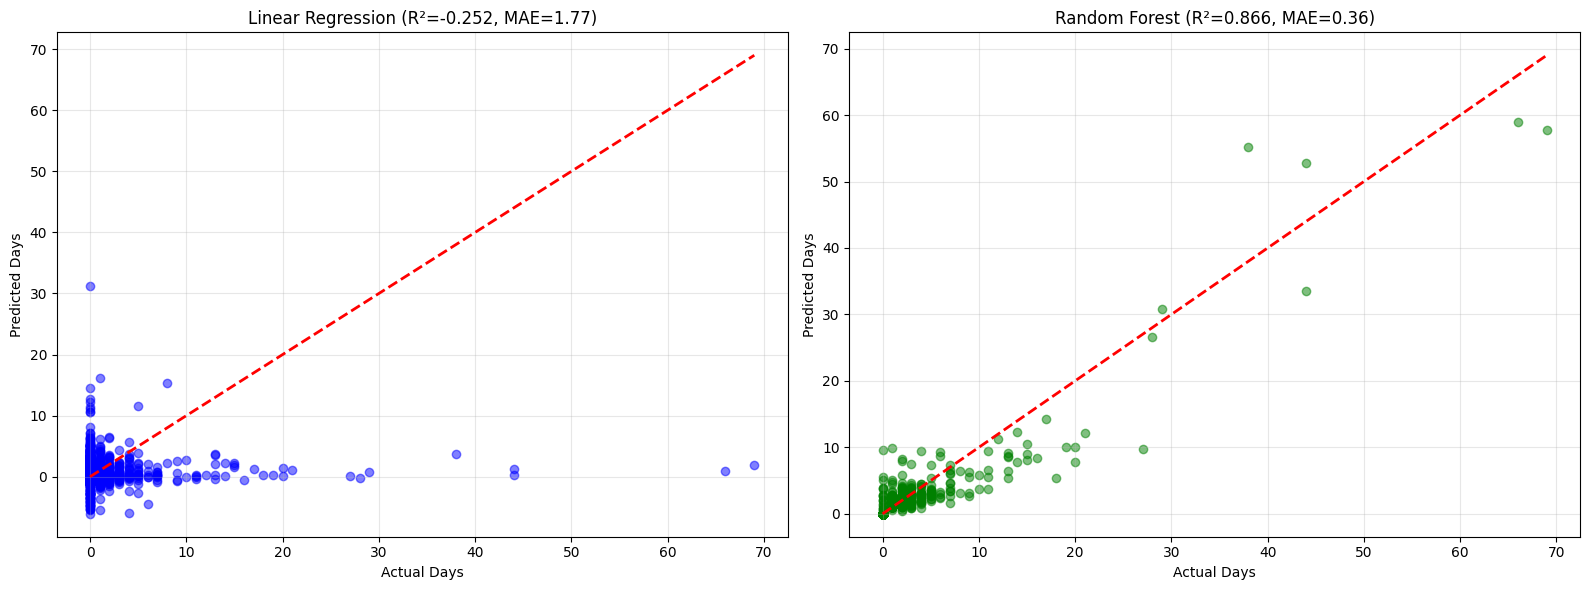

In [31]:
lr_r2 = r2_score(y_test, y_pred_lr)
rf_r2 = r2_score(y_test, y_pred_rf)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
axes[0].plot([0, y_test.max()], [0, y_test.max()], 'r--', lw=2)
axes[0].set_title(f'Linear Regression (R²={lr_r2:.3f}, MAE={lr_mae:.2f})')
axes[0].set_xlabel('Actual Days')
axes[0].set_ylabel('Predicted Days')
axes[0].grid(True, alpha=0.3)

# Right: Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.5, color='green')
axes[1].plot([0, y_test.max()], [0, y_test.max()], 'r--', lw=2)
axes[1].set_title(f'Random Forest (R²={rf_r2:.3f}, MAE={rf_mae:.2f})')
axes[1].set_xlabel('Actual Days')
axes[1].set_ylabel('Predicted Days')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
# weighted aggregate to state level (weights = Days with AQI)
state_level_weighted = (
    df_cleaned.assign(weighted_unhealthy=df_cleaned['Unhealthy Days'])
      .groupby('State', as_index=False)
      .agg({
          'Unhealthy Days': 'sum',
          'Days with AQI': 'sum'
      })
)

state_level_weighted['Unhealthy Rate'] = (
    state_level_weighted['Unhealthy Days'] /
    state_level_weighted['Days with AQI'] * 100
)

In [33]:
state_level_weighted.sort_values(by='Unhealthy Rate',ascending=False).head()

,State,Unhealthy Days,Days with AQI,Unhealthy Rate
4,California,1464,94695,1.546016
2,Arizona,197,25389,0.775927
33,North Dakota,133,18542,0.717290
36,Oregon,263,37137,0.708189
1,Alaska,84,11904,0.705645
